In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
from google.colab import files
uploaded = files.upload()


Saving HSL_12022024195310707.csv to HSL_12022024195310707.csv


In [6]:
import numpy as np
import pandas as pd
import ipywidgets as widgets

allFile = pd.read_csv("/content/HSL_12022024195310707.csv")
print(allFile)

      LOCATION    Country TYPE_VAR Type of indicator VARIABLE  \
0          AUS  Australia  AVERAGE           Average      1_1   
1          AUS  Australia  AVERAGE           Average      1_1   
2          AUS  Australia  AVERAGE           Average      1_1   
3          AUS  Australia  AVERAGE           Average      1_1   
4          AUS  Australia  AVERAGE           Average      1_1   
...        ...        ...      ...               ...      ...   
17544      DEU    Germany      DEP       Deprivation      2_8   
17545      DEU    Germany      DEP       Deprivation      2_8   
17546      MEX     Mexico      DEP       Deprivation      4_4   
17547      CAN     Canada      DEP       Deprivation      4_4   
17548      CAN     Canada      DEP       Deprivation      4_4   

                        Indicator   WB Current/Future Well-being  SEX  \
0                Household income  CWB        Current Well-being  TOT   
1                Household income  CWB        Current Well-being  TOT   


In [14]:
allFile = allFile.dropna()

In [15]:
print(allFile["Indicator"])
print("\n===========================================================\n")
sliceFile = pd.DataFrame(allFile, columns =["Country","Indicator","Type of indicator","Time","Value"])
print(allFile)

32                                Employment rate
49       Households with internet access at home 
50       Households with internet access at home 
51       Households with internet access at home 
52       Households with internet access at home 
                           ...                   
15476    Households with internet access at home 
17043                            Perceived health
17044                            Perceived health
17046                           Overcrowding rate
17062                            Perceived health
Name: Indicator, Length: 658, dtype: object


      LOCATION      Country TYPE_VAR Type of indicator VARIABLE  \
32         AUS    Australia  AVERAGE           Average      2_1   
49         AUS    Australia  AVERAGE           Average      3_5   
50         AUS    Australia  AVERAGE           Average      3_5   
51         AUS    Australia  AVERAGE           Average      3_5   
52         AUS    Australia  AVERAGE           Average      3_5   
..

In [9]:
hls_ls = sliceFile.loc[allFile["Indicator"] == "Life satisfaction"]
print(hls_ls)
print("\n===========================================================\n")
print("Total records:")
print(len(hls_ls))

print("\n===========================================================\n")
print("Total Unique Countries:")
print(len(hls_ls["Country"].unique()))

print("\n===========================================================\n")
print("Country List")
print(hls_ls["Country"].unique())

         Country          Indicator Type of indicator  Time     Value
180    Australia  Life satisfaction           Average  2014  7.600000
181    Australia  Life satisfaction           Average  2019  7.500000
182    Australia  Life satisfaction           Average  2020  7.200000
489      Austria  Life satisfaction           Average  2013  7.800000
490      Austria  Life satisfaction           Average  2018  8.002416
...          ...                ...               ...   ...       ...
15227     Canada  Life satisfaction       Deprivation  2017  2.800000
15228     Canada  Life satisfaction       Deprivation  2018  2.500000
15229     Canada  Life satisfaction       Deprivation  2019  2.500000
15230     Canada  Life satisfaction       Deprivation  2020  2.800000
15231     Canada  Life satisfaction       Deprivation  2021  2.800000

[224 rows x 5 columns]


Total records:
224


Total Unique Countries:
35


Country List
['Australia' 'Austria' 'Belgium' 'Canada' 'Czechia' 'Denmark' 'Finland'

In [13]:
hls_train = hls_ls.loc[hls_ls["Time"] == 2021]
hls_train = hls_train.loc[hls_ls["Type of indicator"] == "Average"]
print("\n===========================================================\n")
print("Total records:")
print(len(hls_train))

print("\n===========================================================\n")
print("Total Unique Countries:")
print(len(hls_train["Country"].unique()))

print("\n===========================================================\n")
print("Record:")
print(hls_train)



Total records:
28


Total Unique Countries:
28


Record:
               Country          Indicator Type of indicator  Time     Value
491            Austria  Life satisfaction           Average  2021  8.000000
837            Belgium  Life satisfaction           Average  2021  7.500000
1166            Canada  Life satisfaction           Average  2021  7.900000
1486           Czechia  Life satisfaction           Average  2021  7.300000
1824           Denmark  Life satisfaction           Average  2021  7.300000
2167           Finland  Life satisfaction           Average  2021  7.900000
2512            France  Life satisfaction           Average  2021  6.800000
2856           Germany  Life satisfaction           Average  2021  7.200000
3189            Greece  Life satisfaction           Average  2021  6.800000
3541           Hungary  Life satisfaction           Average  2021  6.500000
4149           Ireland  Life satisfaction           Average  2021  7.300000
4497             Italy  Life 

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop non-numeric columns and 'VARIABLE' from features
X = allFile.select_dtypes(include=['float64', 'int64'])

# Select the 'Indicator' column as the target variable
y = allFile['Indicator']

# Encode the categorical target variable into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 19.869616758705984


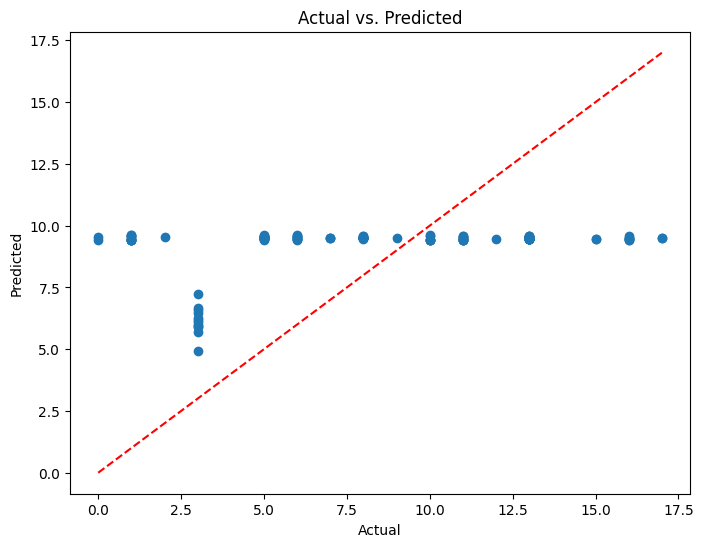

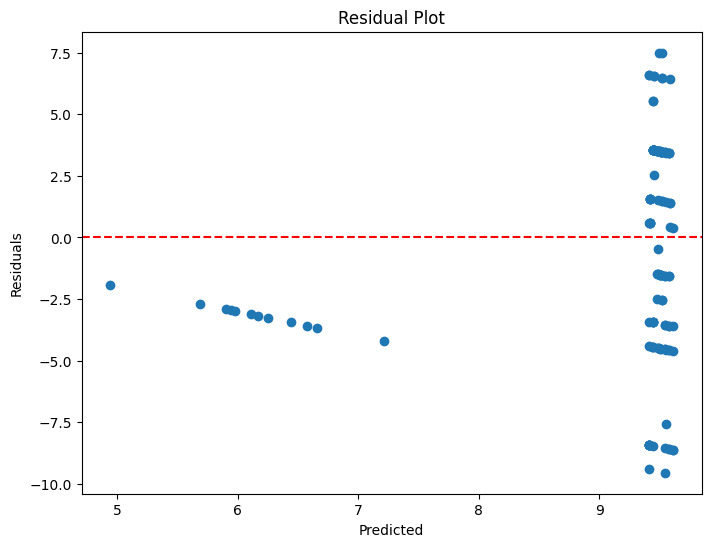

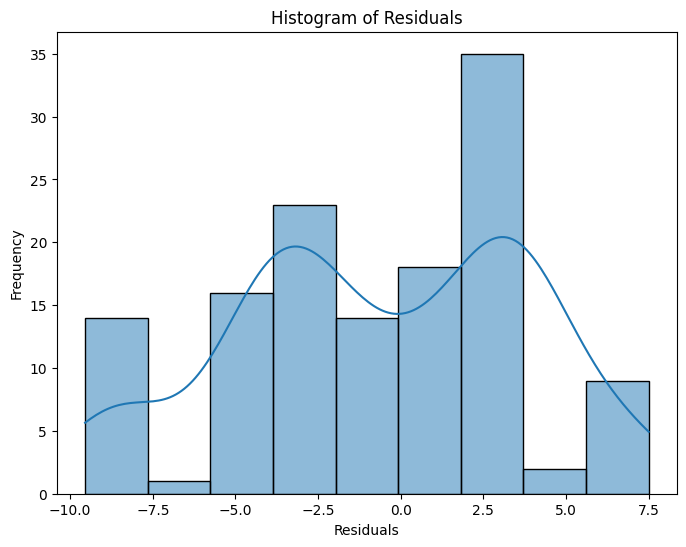

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
